In [33]:
from sklearn.datasets import load_diabetes , load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,roc_auc_score,roc_curve,auc


In [24]:
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

In [25]:
y # we have to correct the labels based on median

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [26]:
def plot_confusion_matrix(cm, title):
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.title(title)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

In [31]:
def evaluate_ann_diabetes(test_size = 0.3 , hidden_layer_size = (64,32)):

  diabetes = load_diabetes()
  x = diabetes.data
  y = diabetes.target
  y = (y > np.median(y)).astype(int)

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = test_size,random_state = 42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.fit_transform(x_test)

  model = MLPClassifier(hidden_layer_sizes = hidden_layer_size,max_iter = 500)
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  y_pred_proba = model.predict_proba(x_test_scaled)[:,1]


  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,average='weighted')
  recall = recall_score(y_test, y_pred,average='weighted')
  f1 = f1_score(y_test, y_pred,average='weighted')
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  cr = classification_report(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred);
  plot_confusion_matrix(cm, "Confusion Matrix")

  print("Results are below\n")
  print("Accuracy:" , accuracy)
  print("precision:" , precision)
  print("Recall:" , recall)
  print("F1 Score:", f1)
  print("ROC AUC score" , roc_auc)
  print("Classification Report is\n", cr)
  print('###############')
  print('###############')





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


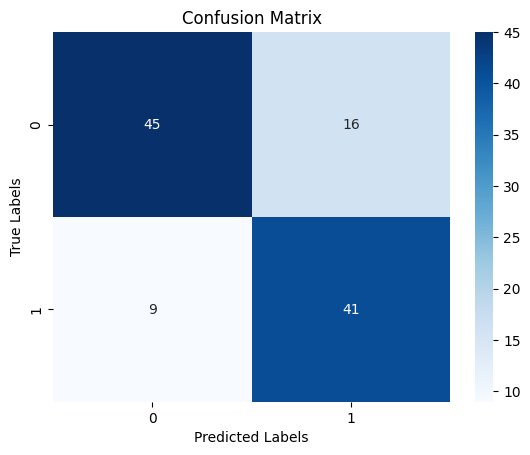

Results are below

Accuracy: 0.7747747747747747
precision: 0.7819661767030189
Recall: 0.7747747747747747
F1 Score: 0.775287274271427
ROC AUC score 0.8318032786885245
Classification Report is
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        61
           1       0.72      0.82      0.77        50

    accuracy                           0.77       111
   macro avg       0.78      0.78      0.77       111
weighted avg       0.78      0.77      0.78       111

###############
###############


In [32]:
test_size =  0.25
hidden_layer_size = (64,32)
evaluate_ann_diabetes(test_size,hidden_layer_size)

In [34]:
def evaluate_ann_breast_cancer(test_size = 0.3 , hidden_layer_size = (64,32)):

  breast_cancer = load_breast_cancer()
  x = breast_cancer.data
  y = breast_cancer.target

  x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = test_size , random_state = 42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.fit_transform(x_test)
  model = MLPClassifier(hidden_layer_sizes = hidden_layer_size,max_iter = 500)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:,1]

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test,y_pred,average = 'weighted')
  recall = recall_score(y_test,y_pred, average = 'weighted')
  f1 = f1_score(y_test,y_pred , average = 'weighted')
  roc_auc = roc_auc_score(y_test,y_pred_proba)
  cr = classification_report(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred);
  plot_confusion_matrix(cm, "Confusion Matrix")

  print("Results are below\n")
  print("Accuracy:" , accuracy)
  print("precision:" , precision)
  print("Recall:" , recall)
  print("F1 Score:", f1)
  print("ROC AUC score" , roc_auc)
  print("Classification Report is\n", cr)
  print('###############')
  print('###############')


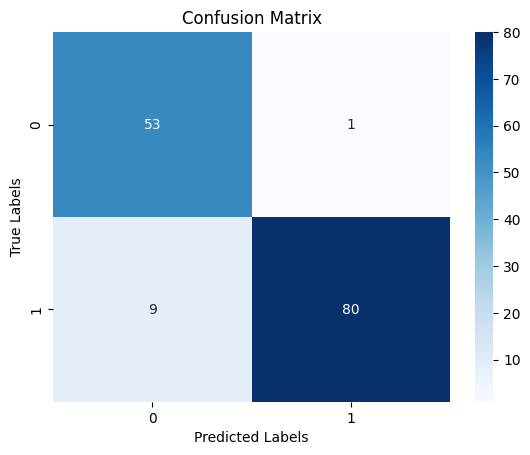

Results are below

Accuracy: 0.9300699300699301
precision: 0.9375001740593139
Recall: 0.9300699300699301
F1 Score: 0.9308358983815374
ROC AUC score 0.9945900957136912
Classification Report is
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        54
           1       0.99      0.90      0.94        89

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143

###############
###############


In [35]:
test_size = 0.25
hidden_layer_size = (64 , 32)
evaluate_ann_breast_cancer(test_size , hidden_layer_size)